# Métodos de bisección y Newton


### Ejercicio 5. Localice y separe las raíces de la ecuación
### $$e^x= 1/x$$

### Calcule aproximadamente las soluciones mediante el método de bisección, con error absoluto menor que $10^{-5}$.

SOLUCIÓN

### Paso 1. Localizar y separar las raíces.

Analicemos la ecuación   $e^x =1/x$ : Para todo $x$, $e^x$ es siempre positivo, por lo que la raíz que buscamos debe ser positiva. Por otro lado, para todo $x>1$, $e^x>e>2$  y $1/x<1$. Por lo que la raíz debe estar entre 0 y 1.

A la hora de plotear, observad que en $x=0$, la función $e^x+1/x$ no está definida. Lo mejor es considerar el numerador de la ecuación: 
<p>$$ e^x=1/x \leftrightarrow xe^x=1  \leftrightarrow xe^x-1=0$$</p>
<p>Entonces estudiemos la función $f(x)=xe^x-1$. </p>

In [1]:
f(x)=x*e^x-1
f

x |--> x*e^x - 1

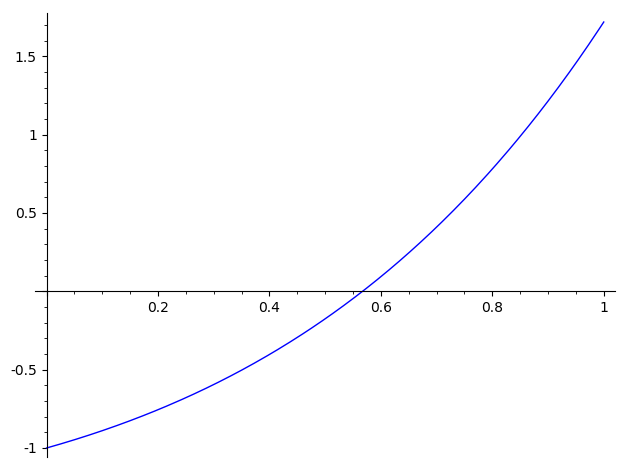

In [2]:
plot(f,x,0,1)

Observamos que la ecuación $f(x)=0$ tiene una raiz en el intervalo $[0.5,0.6]$

### Paso 2. Método de bisección

Vamos a calcular aproximadamente, mediante el método de bisección y con error menor que $10^{-5}$, las soluciones que hay en el intervalo $[0.5,0.6]$.

El número $N$ de pasos del método de bisección que tenemos que dar para alcanzar la precisión deseada debe cumplir
$\displaystyle N>\log_2\left(\frac{b-a}{\varepsilon}\right)-1$

donde $[a,b]$ es el intervalo inicial y $\varepsilon$ es el error permitido.

Entonces, $a=0.5$, $b=0.6$ y $\varepsilon=10^{-5}$. Calculamos el número de pasos:

In [3]:
a=0.5
b=0.6
epsilon=10^(-5)
numerical_approx(log((b-a)/epsilon,2)-1)

12.2877123795494

<p>Luego serán necesarios, como mucho, $N=13$ pasos.</p>
<p>Si hacemos los dos primeros pasos, obtenemos:</p>

In [4]:
#calculamos el punto medio del intervalo inicial [a,b]
a0=a
b0=b
c0=(a0+b0)/2;c0

0.550000000000000

<p>Lo visualizamos:</p>

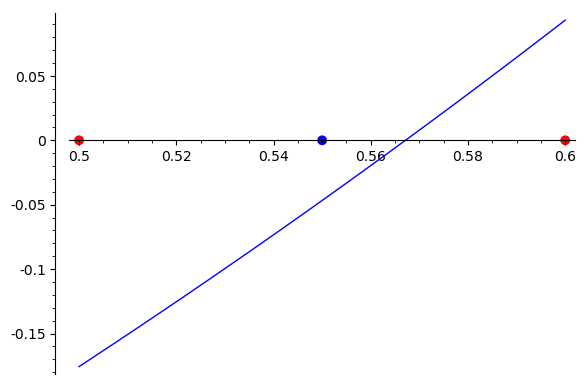

In [5]:
point([(a0,0),(b0,0)] ,color='red',size=50)+point([c0,0],color='blue',size=50)+plot(f,a,b)
#visualizar los puntos nos ayuda a definir el próximo paso

In [6]:
#o evaluamos la función en los extremos del intervalo y en el punto medio. 
f(a0),f(c0),f(b0)

(-0.175639364649936, -0.0467108401729325, 0.0932712802343052)

In [7]:
#definimos el nuevo intervalo dependiendo de los signos de las evaluaciones 
#anteriores. Como f(a) y f(c0) tienen el mismo signo, 
#el nuevo intervalo es [c0,b0]
a1=c0
b1=b0
c1=(a1+b1)/2;c1

0.575000000000000

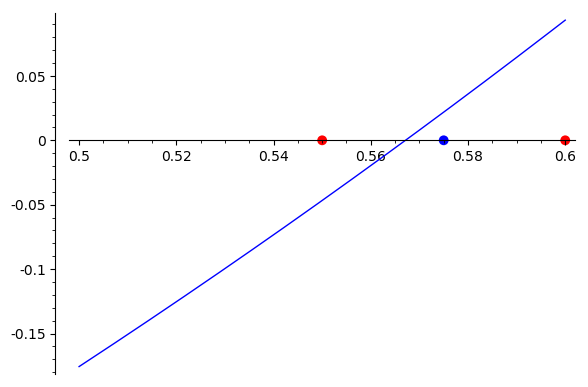

In [8]:
point([a1,0],color='red',size=50)+point([b1,0],color='red',size=50)+point([c1,0],color='blue',size=50)+plot(f,a,b) 
#visualizar los puntos nos ayuda a definir el próximo paso

In [9]:
# Procedemos de la misma manera para definir el siguiente intervalo.
f(a1);f(c1);f(b1)

0.0932712802343052

In [10]:
# Definimos el nuevo intervalo dependiendo de los signos anteriores. 
# Como f(c1) y f(b1) tienen el mismo signo, el nuevo intervalo es [a1,c1]
a2=a1
b2=c1
c2=(a2+b2)/2;c2

0.562500000000000

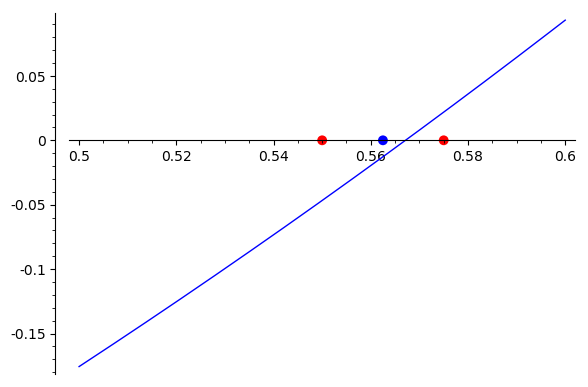

In [11]:
point([a2,0],color='red',size=50)+point([b2,0],color='red',size=50)+point([c2,0],color='blue',size=50)+plot(f,a,b) 
#visualizar los puntos nos ayuda a comprender el algoritmo.

<p>y así sucesivamente  vamos definiendo intervalos más pequeños, aproximándonos a la raíz.</p>

<p>Veamos lo que nos da la programación del algortimo:</p>

In [12]:
show(a)
show(b)

0.500000000000000

0.600000000000000

In [13]:
contador=0
a0=a
b0=b
c0=(b0+a0)/2
while not f(c0)==0 and contador<13:
    if f(a0)*f(c0)<0:
        b0=c0
        c0=(b0+a0)/2  
    else:
        a0=c0
        c0=(b0+a0)/2
    contador=contador+1
c0

0.567144775390625

In [14]:
contador

13

<p>Al haber llegado a la iteración 13, facilmente no hayamos llegado a la solución exacta. Comprobamos:</p>

In [15]:
c0,find_root(f(x),a,b),c0-find_root(f(x),a,b)

(0.567144775390625, 0.5671432904096737, 1.48498095131622e-6)

<p>Por tanto, $c_{13}=0.567144775390625$ es una aproximación de la raíz positiva de la ecuación $xe^x-1=0$ con error absoluto menor que $10^{-5}$.</p>